In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_directory='/content/drive/My Drive/TFG/NEW TUMOR/DATA/archive/Training'
test_directory='/content/drive/My Drive/TFG/NEW TUMOR/DATA/archive/Testing'

In [5]:
image_size = (150, 150)
batch_size = 16

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_directory, image_size=image_size, batch_size=batch_size, validation_split=0.2, subset='training', seed=123)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_directory, image_size=image_size, batch_size=batch_size, validation_split=0.2, subset='validation', seed=123)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_directory,image_size=image_size, batch_size=batch_size,)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


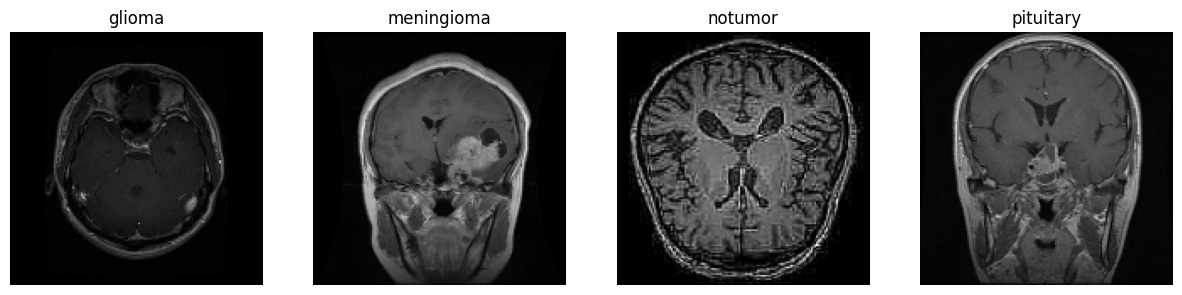

In [ ]:
class_names =train_dataset.class_names

img_dictionary ={}

for images, labels in train_dataset:
    shuffled_indices =np.random.permutation(len(images))
    for i in shuffled_indices:
        image, label =images[i],labels[i]
        label_name =class_names[label]
        if label_name not in img_dictionary:
            img_dictionary[label_name] =image
            break
    if len(img_dictionary) ==len(class_names):
        break

# Plot
fig, axs =plt.subplots(1, len(class_names), figsize =(15, 15))
for i, class_name in enumerate(class_names):
    axs[i].imshow(img_dictionary[class_name].numpy().astype("uint8"))
    axs[i].set_title(class_name)
    axs[i].axis("off")
plt.show()

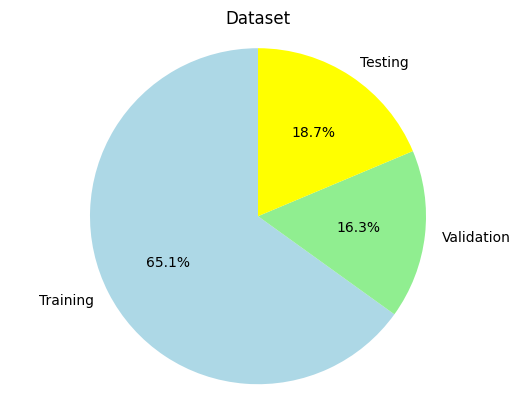

In [ ]:
#Pie-Chart
train_size =len(train_dataset.file_paths)
val_size =len(val_dataset.file_paths)
test_size =len(test_dataset.file_paths)
total_size =train_size +val_size +test_size

train_percent =train_size/total_size *100
val_percent =val_size/total_size *100
test_percent =test_size/total_size *100

labels =["Training", "Validation", "Testing"]
sizes =[train_percent, val_percent, test_percent]
colors =["lightblue", "lightgreen", "yellow"]
fig, ax =plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
plt.title("Dataset")
plt.show()

In [ ]:
#Model 1 creation

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Rescaling, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

input_shape = (150, 150, 3)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=30)

Epoch 1/30
286/286 [==============================] - 919s 3s/step - loss: 1.0066 - accuracy: 0.6368 - val_loss: 0.6780 - val_accuracy: 0.8214
Epoch 2/30
286/286 [==============================] - 266s 928ms/step - loss: 0.7099 - accuracy: 0.7681 - val_loss: 0.5980 - val_accuracy: 0.7968
Epoch 3/30
286/286 [==============================] - 262s 917ms/step - loss: 0.6538 - accuracy: 0.7993 - val_loss: 0.5431 - val_accuracy: 0.8555
Epoch 4/30
286/286 [==============================] - 266s 929ms/step - loss: 0.6249 - accuracy: 0.8140 - val_loss: 0.5595 - val_accuracy: 0.8363
Epoch 5/30
286/286 [==============================] - 263s 920ms/step - loss: 0.5895 - accuracy: 0.8300 - val_loss: 0.5545 - val_accuracy: 0.8476
Epoch 6/30
286/286 [==============================] - 267s 934ms/step - loss: 0.5692 - accuracy: 0.8433 - val_loss: 0.5278 - val_accuracy: 0.8459
Epoch 7/30
286/286 [==============================] - 272s 952ms/step - loss: 0.5351 - accuracy: 0.8508 - val_loss: 0.4821 - va

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                         

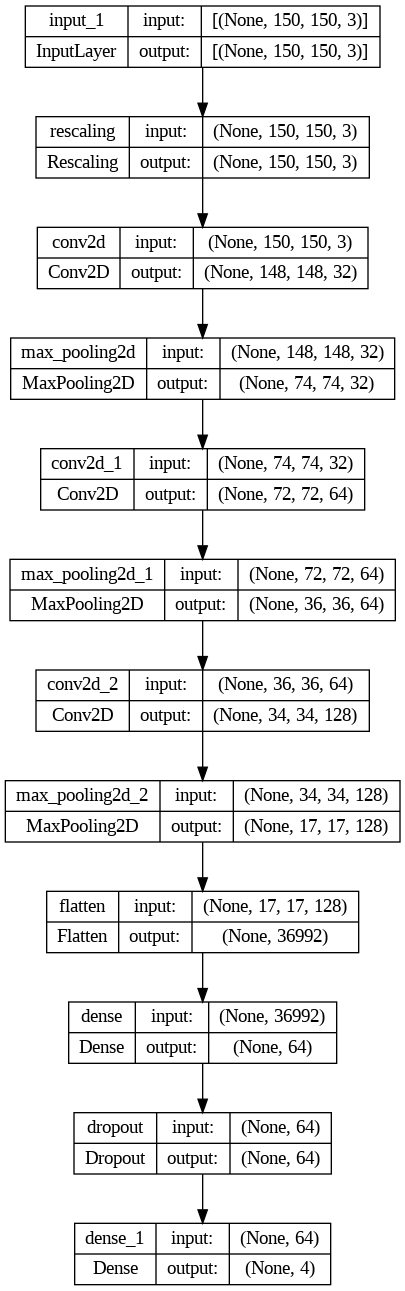

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize

tf.keras.utils.plot_model(model,
                          to_file= "model.png",
                          show_shapes =True,
                          expand_nested= True)

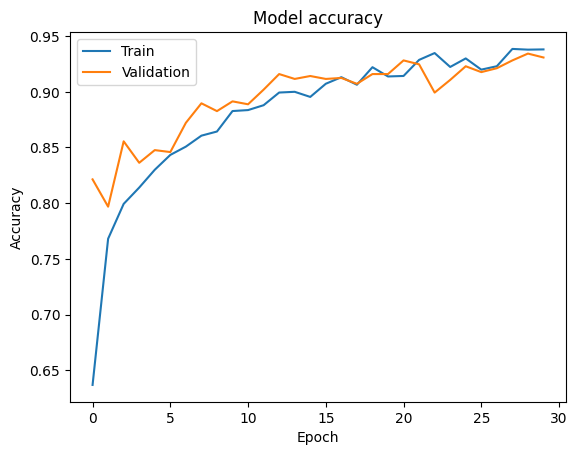

In [ ]:
#Accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc= 'upper left')
plt.show()

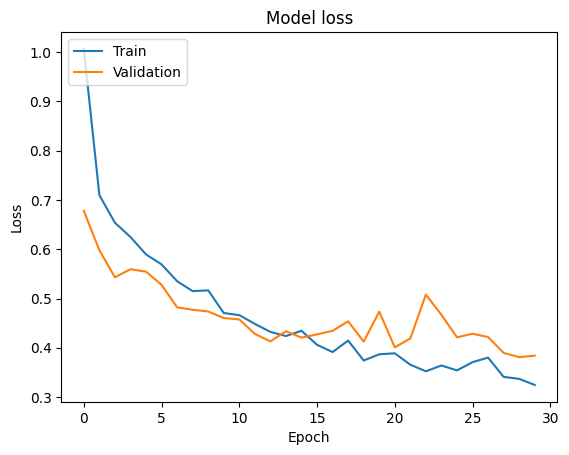

In [ ]:
#Loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc= 'upper left')
plt.show()

In [ ]:
test_loss,test_acc =model.evaluate(test_dataset)
print('Test accuracy:',test_acc)

82/82 [==============================] - 261s 3s/step - loss: 0.3904 - accuracy: 0.9291
Test accuracy: 0.929061770439148


In [ ]:
model.save('4classes_tumor_pred.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/TFG/DATA/4classes_tumor_pred_weights.h5')

In [ ]:
model.save('/content/drive/My Drive/TFG/DATA/4classes_tumor_pred.h5')

In [ ]:
model.save_weights('4classes_tumor_pred_weights.h5')

In [ ]:
!jupyter nbconvert --to html 4_CLASSES_TUMOR_PRED.ipynb

[NbConvertApp] Converting notebook 4_CLASSES_TUMOR_PRED.ipynb to html
[NbConvertApp] Writing 1125419 bytes to 4_CLASSES_TUMOR_PRED.html
